<a href="https://colab.research.google.com/github/RobertaCapretti/RobertaCapretti/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ETL y Análisis Exploratorio de Datos: dataset Airbnb

Importación de librerías a utilizar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from google.colab import files

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

warnings.warn('ignore')

<ipython-input-1-fb00ea0af21f>:16: UserWarning: ignore
  warnings.warn('ignore')


Carga del dataset

In [ ]:
files.upload()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data.csv


In [ ]:
airbnb = pd.read_csv("Airbnb_Open_Data.csv")

<ipython-input-63-56189bfeb2b3>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("Airbnb_Open_Data.csv")


##Análisis exploratorio de datos (EDA)

In [ ]:
print(f'Forma: {airbnb.shape}')
print(f'Columnas: {airbnb.columns}')
airbnb

Forma: (102599, 26)
Columnas: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,102599.0,2.914623e+07,1.625751e+07,1.001254e+06,1.508581e+07,2.913660e+07,4.320120e+07,5.736742e+07
host id,102599.0,4.925411e+10,2.853900e+10,1.236005e+08,2.458333e+10,4.911774e+10,7.399650e+10,9.876313e+10
lat,102591.0,4.072809e+01,5.585652e-02,4.049979e+01,4.068874e+01,4.072229e+01,4.076276e+01,4.091697e+01
long,102591.0,-7.394964e+01,4.952126e-02,-7.424984e+01,-7.398258e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,102385.0,2.012487e+03,5.765556e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,102190.0,8.135845e+00,3.055378e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,102416.0,2.748374e+01,4.950895e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,1.024000e+03
reviews per month,86720.0,1.374022e+00,1.746621e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.000000e+00,9.000000e+01
review rate number,102273.0,3.279106e+00,1.284657e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,102280.0,7.936605e+00,3.221878e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.320000e+02


Conteo de variables categóricas. Para variables numéricas airbnb.describe()

In [ ]:
cols_cat = ['NAME','host_identity_verified', 'neighbourhood group', 'neighbourhood', 'country', 'country code',
            'instant_bookable', 'cancellation_policy', 'room type', 'license']

for col in cols_cat:
  print(f'Columna {col}: {airbnb[col].nunique()} subniveles')

Columna NAME: 61281 subniveles
Columna host_identity_verified: 2 subniveles
Columna neighbourhood group: 7 subniveles
Columna neighbourhood: 224 subniveles
Columna country: 1 subniveles
Columna country code: 1 subniveles
Columna instant_bookable: 2 subniveles
Columna cancellation_policy: 3 subniveles
Columna room type: 4 subniveles
Columna license: 1 subniveles


In [ ]:
airbnb['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [ ]:
print(airbnb['cancellation_policy'])

0           strict
1         moderate
2         flexible
3         moderate
4         moderate
            ...   
102594    flexible
102595    moderate
102596    moderate
102597      strict
102598    flexible
Name: cancellation_policy, Length: 102599, dtype: object


Ver si hay valores null o NaN

In [ ]:
print(f"¿Tiene datos en null o NaN? {airbnb.isnull().any().any()}")
print("¿Qué columnas poseen null o NaN?")
display(airbnb.isnull().any())

¿Tiene datos en null o NaN? True
¿Qué columnas poseen null o NaN?


id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


In [ ]:
# Filtrar las filas que contienen al menos un valor nulo en alguno de los campos
campos = ['neighbourhood group', 'neighbourhood', 'lat', 'long']
filas_con_null = airbnb[airbnb[campos].isnull().any(axis=1)]
print(filas_con_null[campos])

      neighbourhood group       neighbourhood       lat      long
74                    NaN  Washington Heights  40.83139 -73.94095
75                    NaN        Clinton Hill  40.68346 -73.96374
76                    NaN        East Village  40.72828 -73.98801
77                    NaN     Upper East Side  40.76865 -73.95058
78                    NaN            Woodside  40.75038 -73.90334
90                    NaN        Williamsburg  40.71156 -73.96218
91                    NaN            Bushwick  40.70032 -73.93830
92                    NaN    Prospect Heights  40.68233 -73.97261
148                   NaN        East Village  40.72354 -73.98295
161                   NaN        Williamsburg  40.71088 -73.95055
168                   NaN        Clinton Hill  40.68843 -73.96408
196                   NaN             Chelsea  40.74859 -73.99671
206                   NaN    Prospect Heights  40.67870 -73.97262
241                   NaN         East Harlem  40.80942 -73.93936
249       

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Windsor Terrace', ['neighbourhood group', 'lat', 'long']]


,neighbourhood group,lat,long
26,Brooklyn,40.65599,-73.97519
227,Brooklyn,40.65850,-73.98397
428,Brooklyn,40.65749,-73.97675
1001,Brooklyn,40.64791,-73.97904
1069,Brooklyn,40.64814,-73.97304
...,...,...,...
101282,Brooklyn,40.65815,-73.98170
101283,Brooklyn,40.65559,-73.97797
101363,Brooklyn,40.65998,-73.97811
101368,Brooklyn,40.66063,-73.98348


Ver si hay outliers en variables numéricas

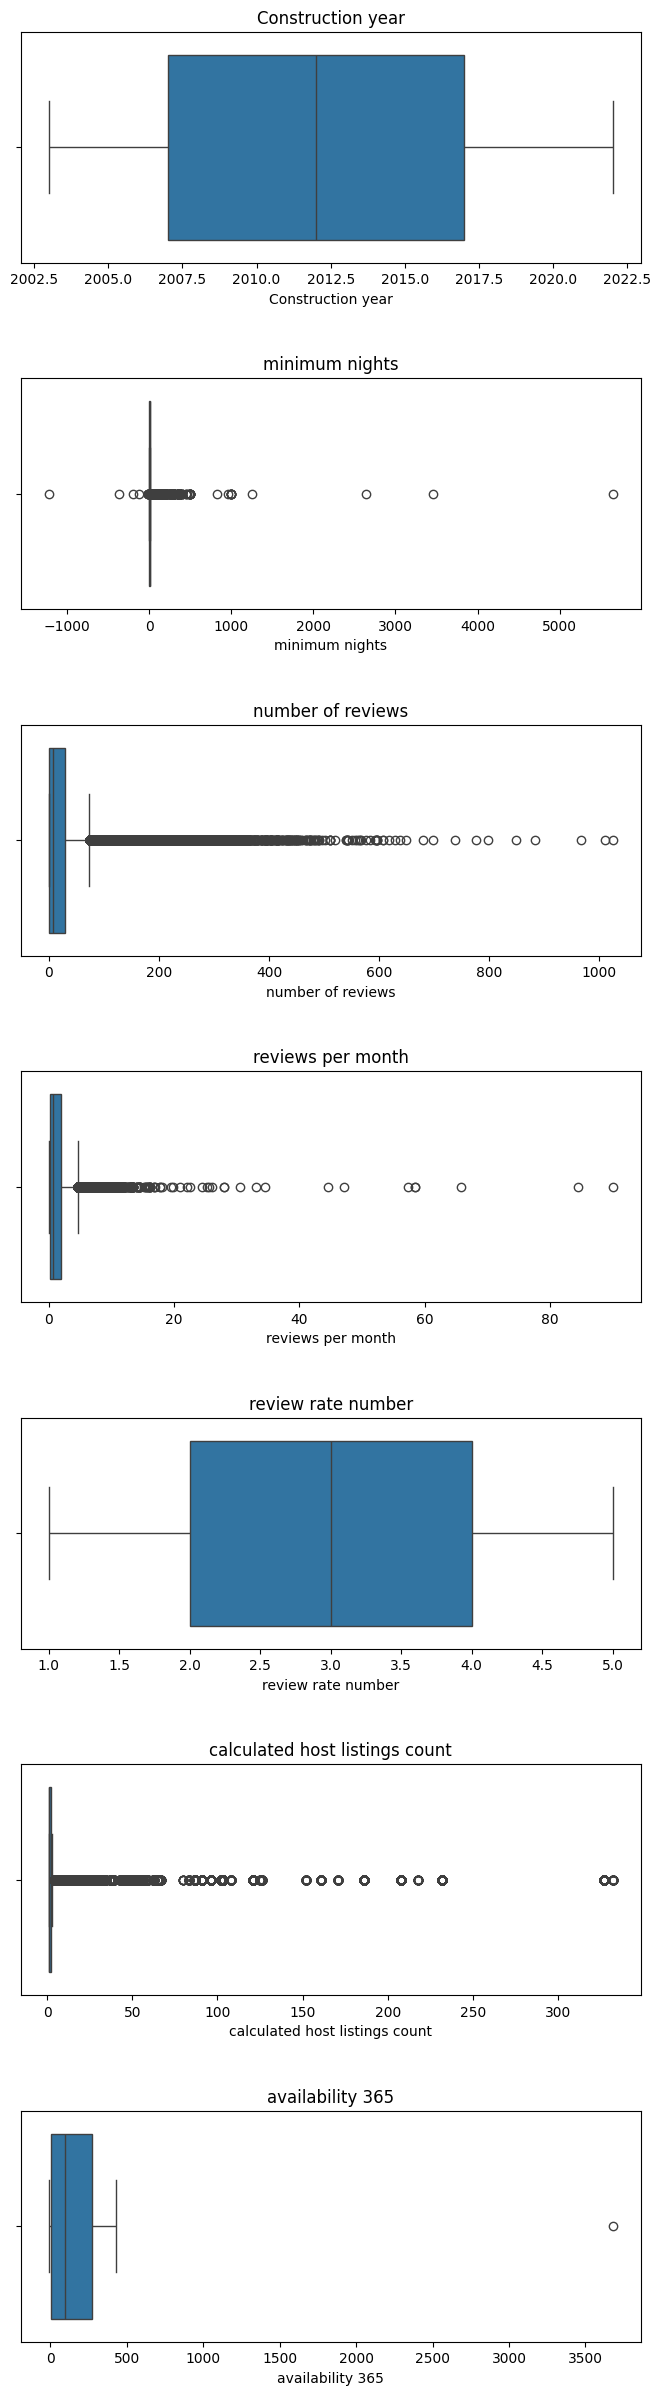

In [ ]:
cols_num=['Construction year','minimum nights', 'number of reviews', 'reviews per month', 'review rate number',
          'calculated host listings count', 'availability 365']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=airbnb, ax=ax[i])
  ax[i].set_title(col)

In [ ]:
airbnb['minimum nights'].min()

-1223.0

In [ ]:
airbnb['minimum nights'].max()

5645.0

In [ ]:
airbnb['availability 365'].min()

-10.0

In [ ]:
airbnb['availability 365'].max()

3677.0

Chequear si hay valores repetidos

In [ ]:
airbnb['id'].duplicated().any()

True

##Transformaciones: Limpieza del dataset

Borrado de registros duplicados, campos sin valor o valores con errores de data entry.

In [ ]:
airbnb = airbnb.drop_duplicates(subset=['id'], keep='first')
airbnb['id'].duplicated().any()

False

In [ ]:
airbnb = airbnb.drop(airbnb[airbnb['minimum nights'] < 0].index)
airbnb = airbnb.drop(airbnb[airbnb['minimum nights'] > 365].index)

In [ ]:
airbnb = airbnb.drop(airbnb[airbnb['availability 365'] < 0].index)
airbnb = airbnb.drop(airbnb[airbnb['availability 365'] > 365].index)

In [ ]:
airbnb = airbnb.drop(['host name','license', 'country', 'country code'], axis=1)

In [ ]:
airbnb['Construction year'].median()

2012.0

In [ ]:
mediana_construction_year = airbnb['Construction year'].median()
airbnb['Construction year'] = airbnb['Construction year'].fillna(mediana_construction_year)

Borrado de valores null/NaN, porque se asume que al no tener precio no se encuentran activos

In [ ]:
airbnb = airbnb.dropna(subset=['price'])

Reemplazo de valores null

In [ ]:
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna('unconfirmed')
airbnb['NAME'] = airbnb['NAME'].fillna('unknown')
airbnb['instant_bookable'] = airbnb['instant_bookable'].fillna('False')
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].fillna('unknown')
airbnb['minimum nights'] = airbnb['minimum nights'].fillna(1)
airbnb['availability 365'] = airbnb['availability 365'].fillna(365)

Reemplazo de neighbourhood group faltantes

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Williamsburg', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Williamsburg', 'neighbourhood group'].fillna('Brooklyn')
airbnb.loc[airbnb['neighbourhood'] == 'Washington Heights', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Washington Heights', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Clinton Hill', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Clinton Hill', 'neighbourhood group'].fillna('Brooklyn')
airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Upper East Side', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Upper East Side', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Woodside', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Woodside', 'neighbourhood group'].fillna('Queens')
airbnb.loc[airbnb['neighbourhood'] == 'Bushwick', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Bushwick', 'neighbourhood group'].fillna('Brooklyn')
airbnb.loc[airbnb['neighbourhood'] == 'Prospect Heights', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Prospect Heights', 'neighbourhood group'].fillna('Brooklyn')
airbnb.loc[airbnb['neighbourhood'] == 'Chelsea', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Chelsea', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'East Harlem', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'East Harlem', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Eastchester', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Eastchester', 'neighbourhood group'].fillna('Bronx')
airbnb.loc[airbnb['neighbourhood'] == 'Harlem', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Harlem', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Chinatown', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Chinatown', 'neighbourhood group'].fillna('Manhattan')
airbnb.loc[airbnb['neighbourhood'] == 'Queens Village', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Queens Village', 'neighbourhood group'].fillna('Queens')
airbnb.loc[airbnb['neighbourhood'] == 'Bedford-Stuyvesant', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Bedford-Stuyvesant', 'neighbourhood group'].fillna('Brooklyn')
airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'neighbourhood group'] = airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'neighbourhood group'].fillna('Manhattan')

Reemplazo de neighbourhood faltantes

In [ ]:
airbnb.loc[547, 'neighbourhood'] = 'East Village'
airbnb.loc[553, 'neighbourhood'] = 'Chinatown'
airbnb.loc[575, 'neighbourhood'] = 'Upper West Side'
airbnb.loc[589, 'neighbourhood'] = 'Prospect Heights'
airbnb.loc[613, 'neighbourhood'] = 'East Village'
airbnb.loc[624, 'neighbourhood'] = 'Midtown'
airbnb.loc[633, 'neighbourhood'] = 'Lower East Side'
airbnb.loc[678, 'neighbourhood'] = 'Greenpoint'
airbnb.loc[681, 'neighbourhood'] = 'Williamsburg'
airbnb.loc[726, 'neighbourhood'] = 'Hell´s Kitchen'
airbnb.loc[731, 'neighbourhood'] = 'Upper West Side'
airbnb.loc[760, 'neighbourhood'] = 'Greenpoint'
airbnb.loc[770, 'neighbourhood'] = 'Windsor Terrace'

Reemplazo de latitud y longitud faltantes

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'lat'].fillna(40.80318)
airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'Upper West Side', 'long'].fillna(-73.96549)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Crown Heights', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'Crown Heights', 'lat'].fillna(40.67562)
airbnb.loc[airbnb['neighbourhood'] == 'Crown Heights', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'Crown Heights', 'long'].fillna(-73.94662)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Greenpoint', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'Greenpoint', 'lat'].fillna(40.73463)
airbnb.loc[airbnb['neighbourhood'] == 'Greenpoint', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'Greenpoint', 'long'].fillna(-73.95084)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'lat'].fillna(40.72684)
airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'East Village', 'long'].fillna(-73.97989)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'West Village', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'West Village', 'lat'].fillna(40.73544)
airbnb.loc[airbnb['neighbourhood'] == 'West Village', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'West Village', 'long'].fillna(-74.00424)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Elmhurst', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'Elmhurst', 'lat'].fillna(40.73686)
airbnb.loc[airbnb['neighbourhood'] == 'Elmhurst', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'Elmhurst', 'long'].fillna(-73.87693)

In [ ]:
airbnb.loc[airbnb['neighbourhood'] == 'Flatiron District', 'lat'] = airbnb.loc[airbnb['neighbourhood'] == 'Flatiron District', 'lat'].fillna(40.74044)
airbnb.loc[airbnb['neighbourhood'] == 'Flatiron District', 'long'] = airbnb.loc[airbnb['neighbourhood'] == 'Flatiron District', 'long'].fillna(-73.99209)

In [ ]:
campos = ['neighbourhood group', 'neighbourhood', 'lat', 'long']
filas_con_null = airbnb[airbnb[campos].isnull().any(axis=1)]
print(filas_con_null[campos])

Empty DataFrame
Columns: [neighbourhood group, neighbourhood, lat, long]
Index: []


##Tipos de datos
Campo price. Dividir el campo en dos campos (Currency & Price)

In [ ]:
airbnb.price[0].split()

['$966']

In [ ]:
airbnb[['Currency', 'Price']] = airbnb['price'].str.extract(r'(\D*)(\d+)')
airbnb['Price'] = airbnb['Price'].astype(float)
airbnb = airbnb.drop(['price'], axis=1)

In [ ]:
airbnb['replacement_value'] = airbnb.apply(lambda x: x['Price'] * 0.14 if x['cancellation_policy'] == 'strict' else x['Price'] * 0.03, axis=1)
airbnb['service fee'].fillna(airbnb['replacement_value'], inplace=True)
airbnb.drop(columns=['replacement_value'], inplace=True)

In [ ]:
airbnb['service fee'] = airbnb['service fee'].str.replace('$', '')
airbnb['service fee'] = airbnb['service fee'].astype(float)

<ipython-input-102-87748e07a89d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['service fee'] = airbnb['service fee'].str.replace('$', '')


In [ ]:
airbnb['Construction year'] = airbnb['Construction year'].astype(int)
airbnb['minimum nights'] = airbnb['minimum nights'].astype(int)
airbnb['availability 365'] = airbnb['availability 365'].astype(int)

In [ ]:
print(f"¿Tiene datos en null o NaN? {airbnb.isnull().any().any()}")
print("¿Qué columnas poseen null o NaN?")
display(airbnb.isnull().any())

¿Tiene datos en null o NaN? True
¿Qué columnas poseen null o NaN?


id                                False
NAME                              False
host id                           False
host_identity_verified            False
neighbourhood group               False
neighbourhood                     False
lat                               False
long                              False
instant_bookable                  False
cancellation_policy               False
room type                         False
Construction year                 False
service fee                        True
minimum nights                    False
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                  False
house_rules                        True
Currency                          False
Price                             False
dtype: bool

Renombre de campos

In [ ]:
airbnb = airbnb.rename(columns={'id': 'ID'})
airbnb = airbnb.rename(columns={'NAME': 'House_Name'})
airbnb = airbnb.rename(columns={'host id': 'ID_Host'})
airbnb = airbnb.rename(columns={'host_identity_verified': 'Host_Identity_Verified'})
airbnb = airbnb.rename(columns={'neighbourhood group': 'Neighbourhood_Group'})
airbnb = airbnb.rename(columns={'neighbourhood': 'Neighbourhood'})
airbnb = airbnb.rename(columns={'lat': 'Latitud'})
airbnb = airbnb.rename(columns={'long': 'Longitud'})
airbnb = airbnb.rename(columns={'instant_bookable': 'Instant_Bookable'})
airbnb = airbnb.rename(columns={'cancellation_policy': 'Cancellation_Policy'})
airbnb = airbnb.rename(columns={'room type': 'Room_Type'})
airbnb = airbnb.rename(columns={'Construction year': 'Construction_Year'})
airbnb = airbnb.rename(columns={'service fee': 'Service_Fee'})
airbnb = airbnb.rename(columns={'minimum nights': 'Min_Nights'})
airbnb = airbnb.rename(columns={'number of reviews': 'Number_Reviews'})
airbnb = airbnb.rename(columns={'last review': 'Last_Review'})
airbnb = airbnb.rename(columns={'reviews per month': 'Reviews_Per_Month'})
airbnb = airbnb.rename(columns={'review rate number': 'Review_Rate_Number'})
airbnb = airbnb.rename(columns={'calculated host listings count': 'Calculated_Host_Listings_Count'})
airbnb = airbnb.rename(columns={'availability 365': 'Availability_365'})
airbnb = airbnb.rename(columns={'house_rules': 'House_Rules'})

Unificación de criterio de escritura

In [ ]:
for columna in airbnb.columns:
    if airbnb[columna].dtype == 'object':
        airbnb[columna] = airbnb[columna].apply(lambda x: x.capitalize() if isinstance(x, str) else x)

In [ ]:
airbnb['Neighbourhood_Group'] = airbnb['Neighbourhood_Group'].str.title()
airbnb['Neighbourhood'] = airbnb['Neighbourhood'].str.title()

In [ ]:
airbnb['Neighbourhood_Group'] = airbnb['Neighbourhood_Group'].replace({'Manhatan': 'Manhattan', 'Brookln': 'Brooklyn'}, regex=True)
airbnb['Neighbourhood'] = airbnb['Neighbourhood'].replace({'Hell´S Kitchen': "Hell's Kitchen", "Hell'S Kitchen": "Hell's Kitchen",
                                                           "Prince'S Bay":"Prince's Bay", "Bull'S Head":"Bull's Head"}, regex=True)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98591 entries, 0 to 102057
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              98591 non-null  int64  
 1   House_Name                      98591 non-null  object 
 2   ID_Host                         98591 non-null  int64  
 3   Host_Identity_Verified          98591 non-null  object 
 4   Neighbourhood_Group             98591 non-null  object 
 5   Neighbourhood                   98591 non-null  object 
 6   Latitud                         98591 non-null  float64
 7   Longitud                        98591 non-null  float64
 8   Instant_Bookable                98591 non-null  object 
 9   Cancellation_Policy             98591 non-null  object 
 10  Room_Type                       98591 non-null  object 
 11  Construction_Year               98591 non-null  int64  
 12  Service_Fee                    

## Visualización

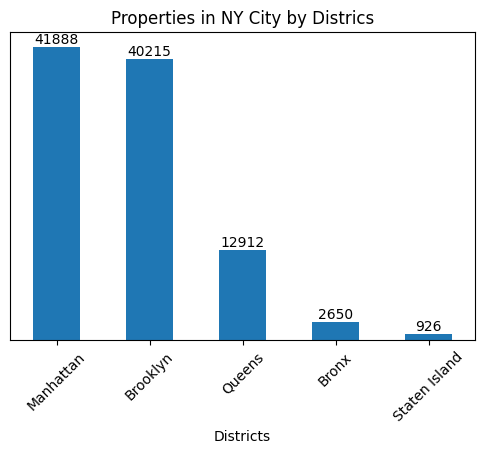

In [ ]:
plt.figure(figsize=(6,4))
Properties_Neighbourhood_Group = airbnb.Neighbourhood_Group.value_counts()
Properties_Neighbourhood_Group.plot.bar()
plt.title("Properties in NY City by Districs")
plt.xlabel("Districts")
plt.ylabel("Amount of Properties")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)  #Ocultar los valores de Y
for index, value in enumerate(Properties_Neighbourhood_Group):
    plt.text(index, value + 1, str(value), ha='center', va='bottom') #Agrega etiquetas de texto con los valores a cada barra

In [ ]:
grupos_unicos = airbnb['Neighbourhood_Group'].unique()

# Iterar sobre cada grupo único
for grupo in grupos_unicos:
    # Filtrar el DataFrame por el grupo actual
    df_grupo = airbnb[airbnb['Neighbourhood_Group'] == grupo]

    # Mostrar el nombre del grupo
    print(f'Grupo de Barrios: {grupo}')

    # Mostrar la lista de barrios para el grupo actual
    barrios = df_grupo['Neighbourhood'].unique()
    print(barrios)
    print()  # Imprimir una línea en blanco para separar los resultados de cada grupo

Grupo de Barrios: Brooklyn
['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg' 'Fort Greene' 'Crown Heights' 'Park Slope'
 'Windsor Terrace' 'Bushwick' 'Flatbush' 'Prospect-Lefferts Gardens'
 'Greenpoint' 'Prospect Heights' 'Brooklyn Heights' 'Carroll Gardens'
 'Flatlands' 'Cobble Hill' 'Dumbo' 'Gowanus' 'East Flatbush' 'Boerum Hill'
 'Gravesend' 'East New York' 'Fort Hamilton' 'Sunset Park'
 'Brighton Beach' 'Cypress Hills' 'Bay Ridge' 'Sheepshead Bay'
 'Columbia St' 'Vinegar Hill' 'Canarsie' 'Borough Park'
 'Downtown Brooklyn' 'Midwood' 'Bensonhurst' 'Red Hook' 'Dyker Heights'
 'Sea Gate' 'Brownsville' 'Navy Yard' 'Manhattan Beach' 'Bergen Beach'
 'Coney Island' 'Bath Beach' 'Mill Basin' 'Gerritsen Beach']

Grupo de Barrios: Manhattan
['Midtown' 'Harlem' 'East Harlem' "Hell's Kitchen" 'Chinatown'
 'Upper West Side' 'West Village' 'Chelsea' 'Inwood' 'East Village'
 'Lower East Side' 'Kips Bay' 'Soho' 'Upper East Side'
 'Washington Heights' 'Financial Distri

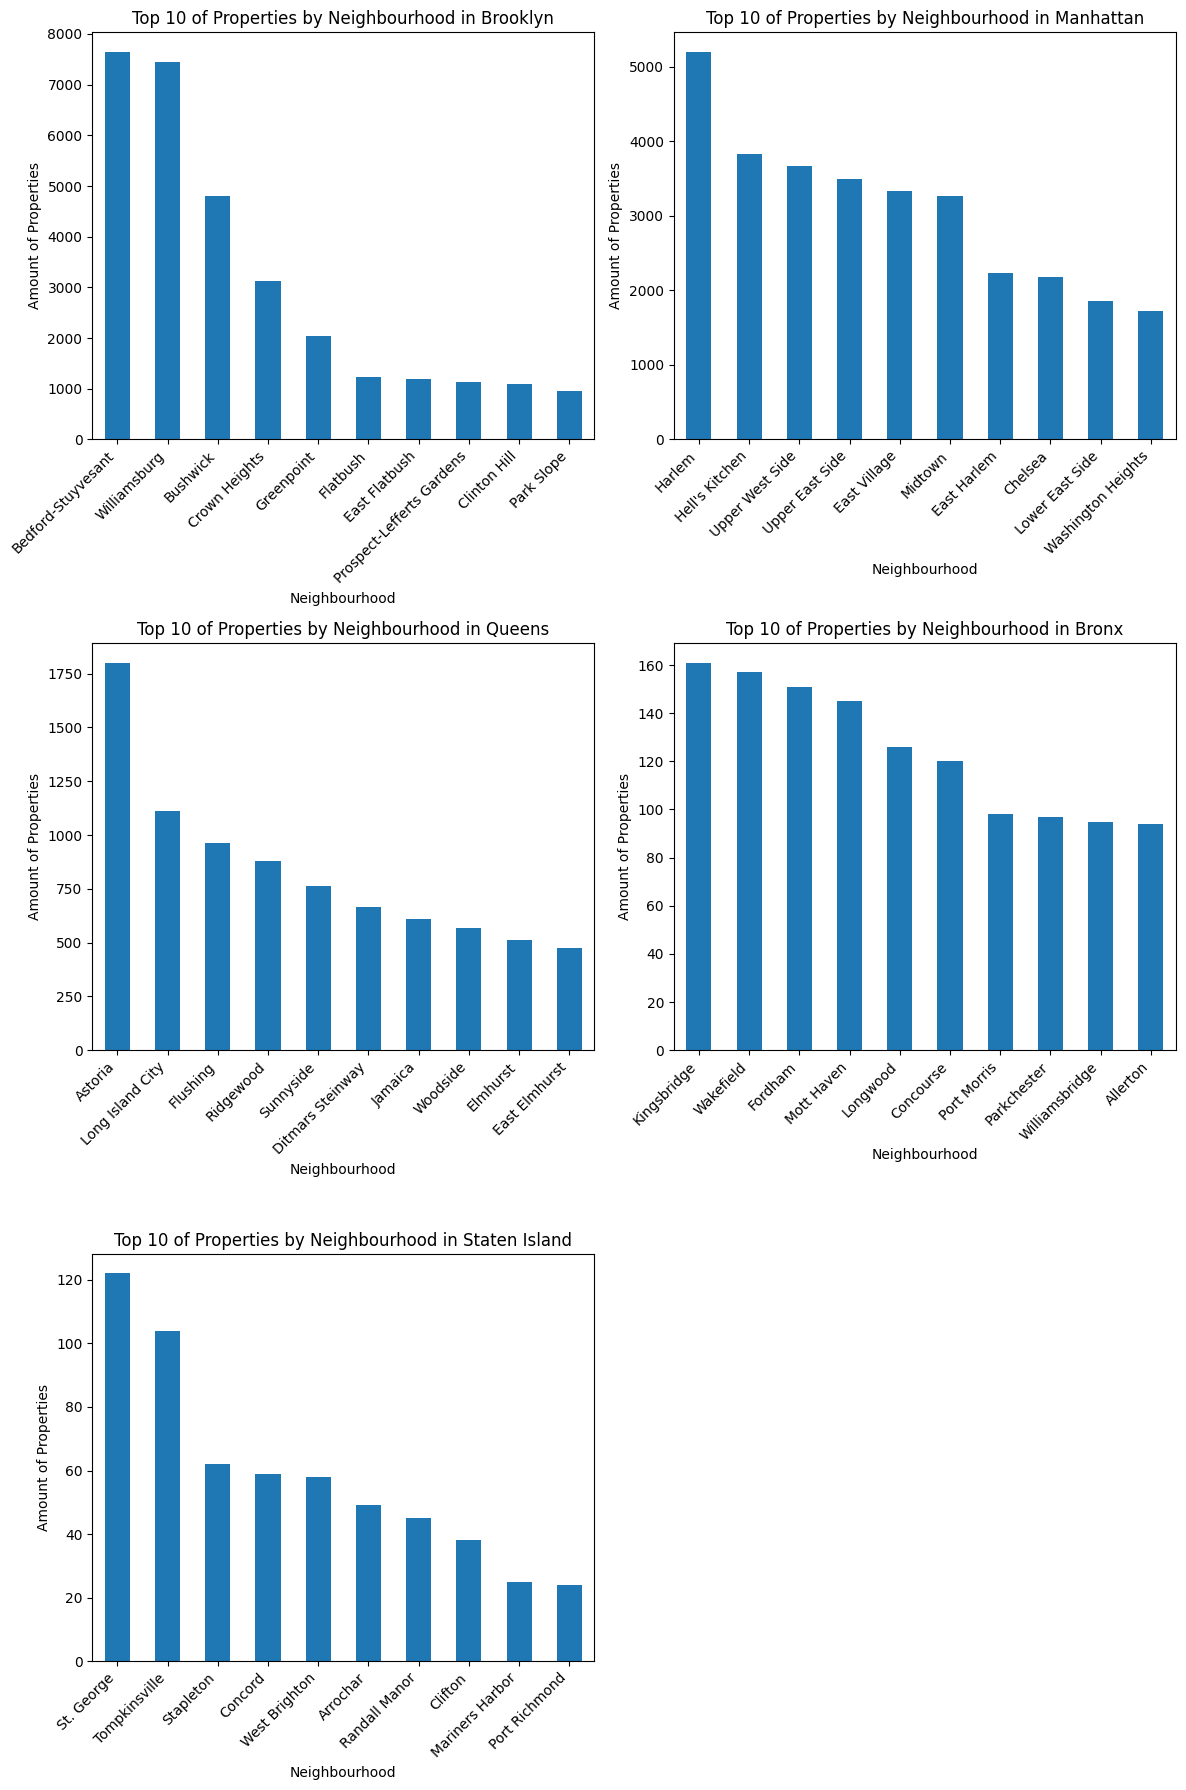

In [ ]:
distritos_unicos = airbnb['Neighbourhood_Group'].unique()

# Calcular el número de subgráficos necesarios
num_subplots = len(distritos_unicos)

# Calcular el número de filas y columnas para organizar los subgráficos
num_filas = math.ceil(num_subplots / 2)
num_columnas = min(2, num_subplots)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6 * num_filas))

# Iterar sobre cada distrito y trazar un gráfico de barras por separado
for i, distrito in enumerate(distritos_unicos, 1):
    plt.subplot(num_filas, num_columnas, i)  # Configurar el gráfico en la cuadrícula
    propiedades_por_barrio = airbnb[airbnb['Neighbourhood_Group'] == distrito]['Neighbourhood'].value_counts()
    propiedades_por_barrio = propiedades_por_barrio.head(10)
    ax = propiedades_por_barrio.plot.bar()
    ax.set_title(f'Top 10 of Properties by Neighbourhood in {distrito}')
    ax.set_xlabel('Neighbourhood')
    ax.set_ylabel("Amount of Properties")
    # Ajustar las etiquetas del eje x para que estén centradas en las barras
    ax.set_xticks(np.arange(len(propiedades_por_barrio)))
    ax.set_xticklabels(propiedades_por_barrio.index, rotation=45, ha='right')

# Ajustar el diseño de la figura
plt.tight_layout()


Text(0, 0.5, 'Amount of Properties')

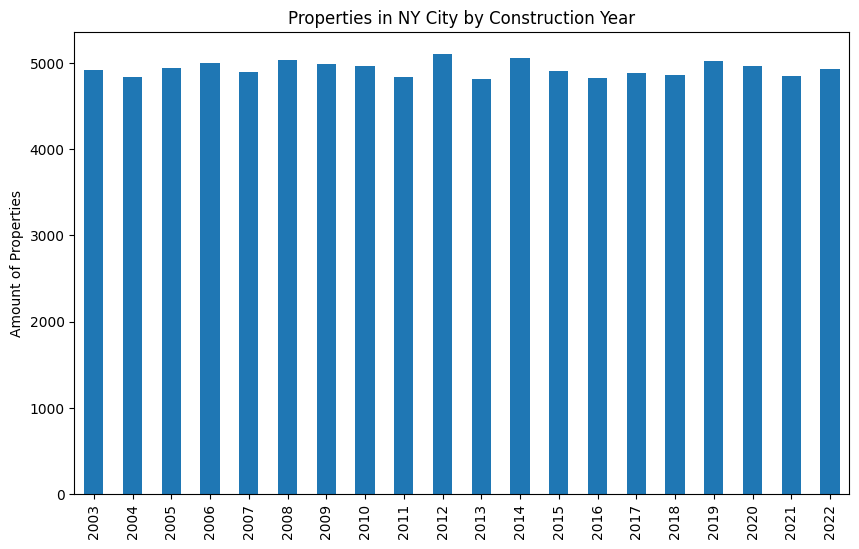

In [ ]:
Properties_Year = airbnb['Construction_Year'].value_counts().sort_index() # Ordenar los datos por el año

plt.figure(figsize=(10,6))
Properties_Year.plot.bar()
plt.title("Properties in NY City by Construction Year")
plt.ylabel("Amount of Properties")

In [ ]:
airbnb['Room_Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Text(0, 0.5, 'Room Type')

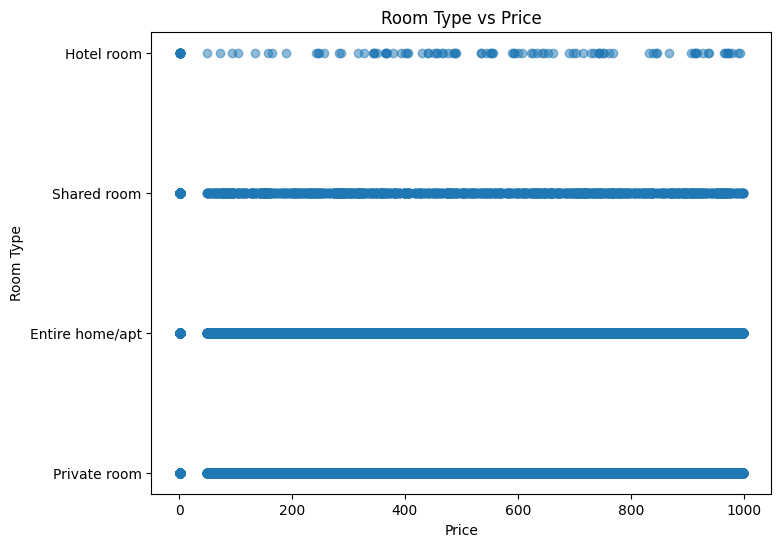

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(airbnb['Price'], airbnb['Room_Type'], alpha=0.5)
plt.title('Room Type vs Price')
plt.xlabel('Price')
plt.ylabel('Room Type')

Text(0, 0.5, 'Density')

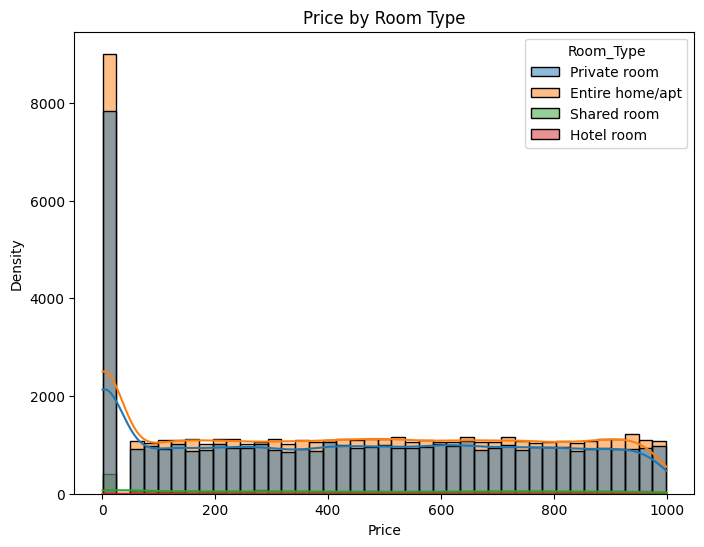

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=airbnb, x='Price', hue='Room_Type', kde=True)
plt.title('Price by Room Type')
plt.xlabel('Price')
plt.ylabel('Density')

In [ ]:
airbnb.groupby('Neighbourhood')['Price'].mean()

Neighbourhood
Allerton           344.106383
Arden Heights      552.666667
Arrochar           532.306122
Arverne            441.463303
Astoria            426.351471
                      ...    
Windsor Terrace    406.420561
Woodhaven          372.497297
Woodlawn           471.275862
Woodrow             26.666667
Woodside           437.245614
Name: Price, Length: 224, dtype: float64

Text(0, 0.5, 'Frequency')

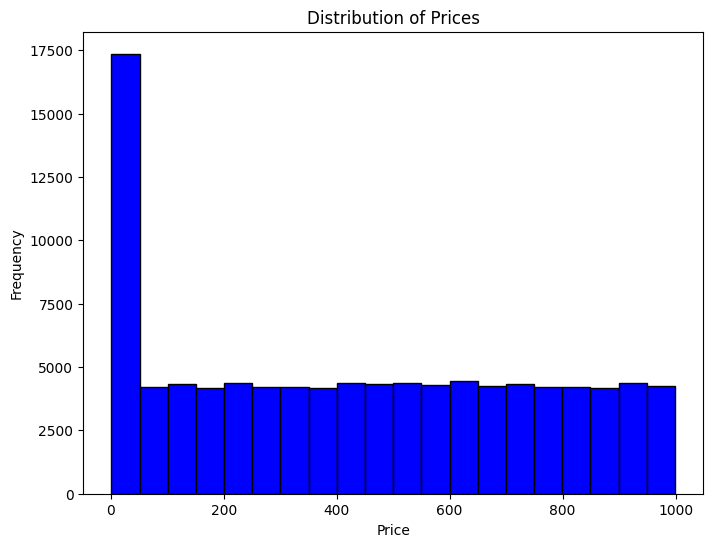

In [ ]:
plt.figure(figsize=(8, 6))
airbnb['Price'].plot.hist(bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [ ]:
Total = (airbnb['Price'] * airbnb['Min_Nights']).sum()
print(Total)

331872299.0


In [ ]:
Cost = (airbnb['Service_Fee'] * airbnb['Min_Nights']).sum()
print(Cost)

95590692.0


In [ ]:
Margin = Total - Cost
print(Margin)

236281607.0


<ipython-input-122-721f16e1cd4f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb.corr(), linewidths = 0.1, vmax = 1.0, square = True,


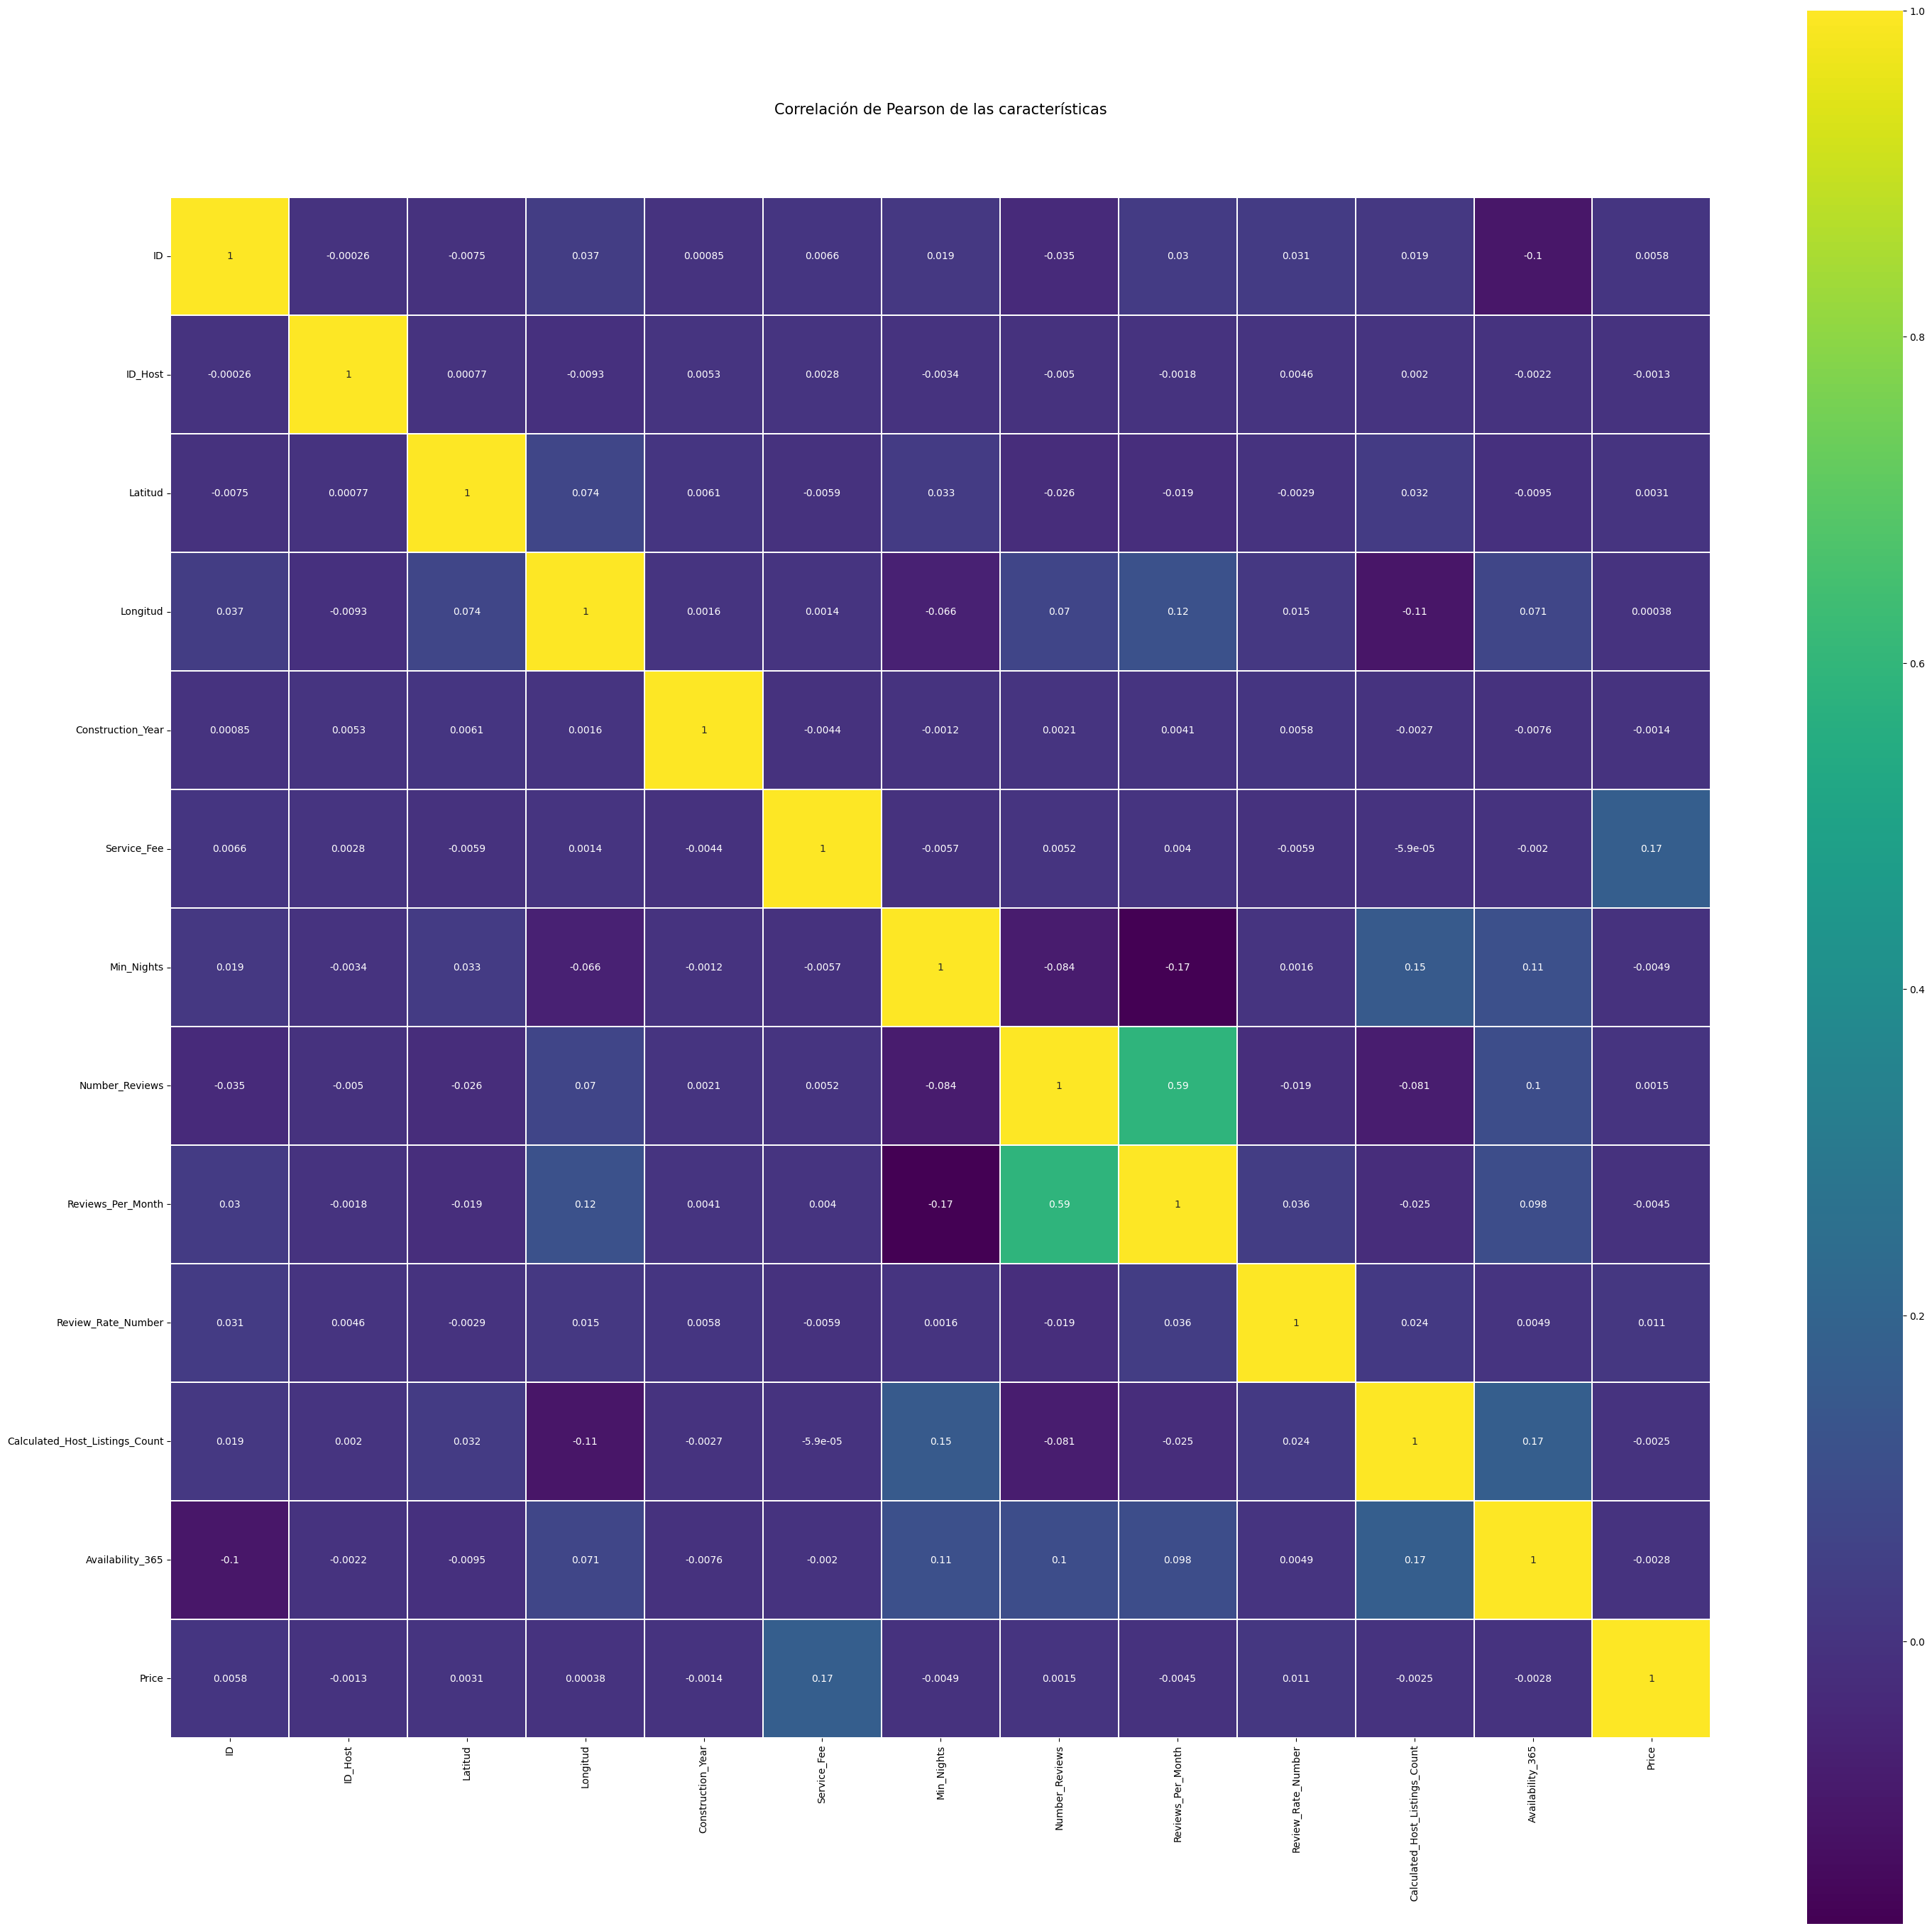

In [ ]:
colormap = plt.cm.viridis   # mapa de colores
plt.figure(figsize = (35,35))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(airbnb.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap,linecolor = 'white', annot = True)
plt.show()

<ipython-input-123-e027298a2270>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset_corr = airbnb[subset_variables].corr()


Text(0.5, 1.0, 'Correlación de las variables seleccionadas')

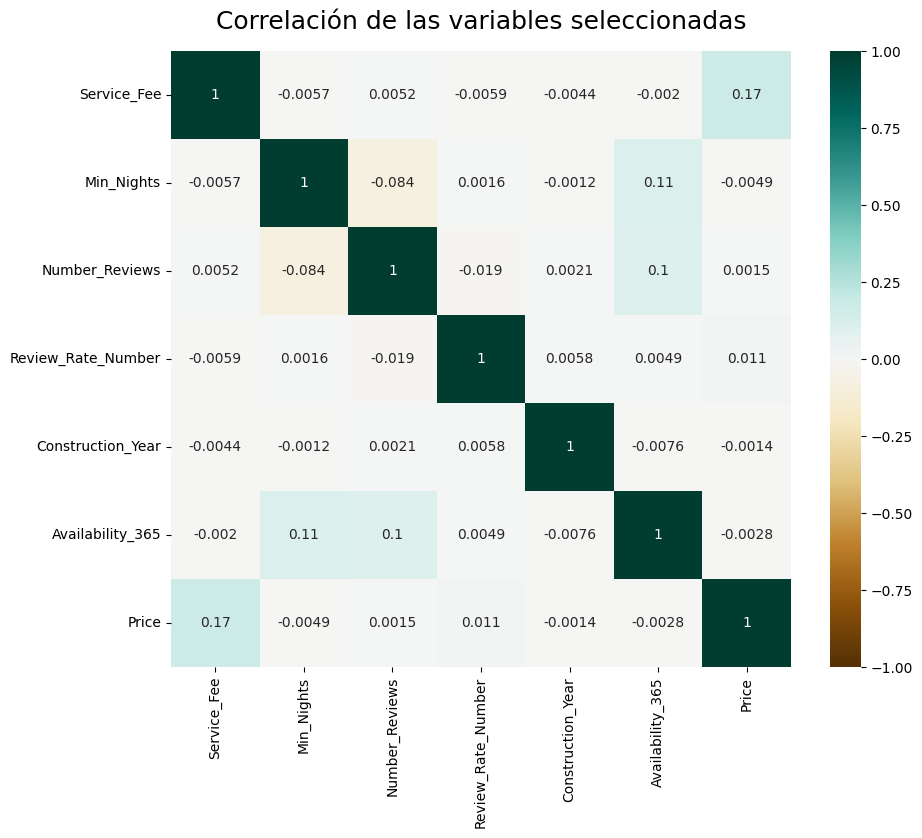

In [ ]:
# Seleccionar solo algunas variables específicas del DataFrame
subset_variables = ['Host_Identity_Verified', 'Neighbourhood_Group','Neighbourhood','Instant_Bookable',
                    'Cancellation_Policy', 'Room_Type', 'Service_Fee', 'Min_Nights', 'Number_Reviews',
                    'Review_Rate_Number', 'Construction_Year', 'Availability_365', 'Price'
                   ]

# Calcular la correlación entre las variables seleccionadas
subset_corr = airbnb[subset_variables].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(subset_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables seleccionadas', fontdict={'fontsize': 18}, pad=16)